#### Dharavath Ramdas
linkedin link: https://www.linkedin.com/in/dharavath-ramdas-a283aa213/

Github link:  https://github.com/dharavathramdas101

# Domain:   Insurence
## Project Title: Insurance Premium Prediction

## Machine Learning Technology


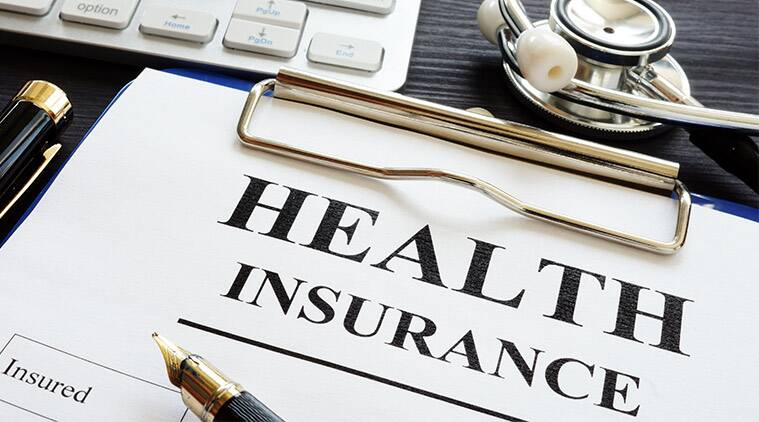

In [224]:
#@title 
from IPython import display
display.Image("https://images.indianexpress.com/2020/02/health-insurance.jpg")

## Problem Statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

## Approach:
 The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.
Some Famous Algorithms: - Multiple Linear Regression, Decision tree Regression and
Gradient Boosting, Decision tree, Regression

## Results: 
You have to build a solution that should able to predict the premium of the
personal for health insurance

### Dataset Link: 
https://raw.githubusercontent.com/dharavathramdas101/Machine-Learning-Algorithms/main/insurence_data/insurance.csv

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Read Data

In [174]:
df = pd.read_csv(r"https://raw.githubusercontent.com/dharavathramdas101/Machine-Learning-Algorithms/main/insurence_data/insurance.csv")

In [176]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [177]:
# Check rows and columns of data

In [178]:
df.shape

(1338, 7)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [180]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [182]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [183]:
# Checking the male and female

In [184]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [187]:
# Checking the region

In [185]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Checking the age

In [186]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [40]:
# Check unique values of target variables

In [41]:
df['expenses'].value_counts()

1639.56     2
16884.92    1
29330.98    1
2221.56     1
19798.05    1
           ..
7345.08     1
26109.33    1
28287.90    1
1149.40     1
29141.36    1
Name: expenses, Length: 1337, dtype: int64

In [42]:
# define numerical and categorical columns

In [43]:
numerical_fea = [fea for fea in df.columns if df[fea].dtype != 'O']
categorical_fea = [fea for fea in df.columns if df[fea].dtype == 'O']

In [44]:
# print columns

In [45]:
print('we have {} numerical features : {}'.format(len(numerical_fea),numerical_fea))
print()
print('we have {} categorical features : {}'.format(len(categorical_fea),categorical_fea))

we have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

we have 3 categorical features : ['sex', 'smoker', 'region']


In [46]:
# Checking missing values

In [47]:
# plotting the missing values count for each column

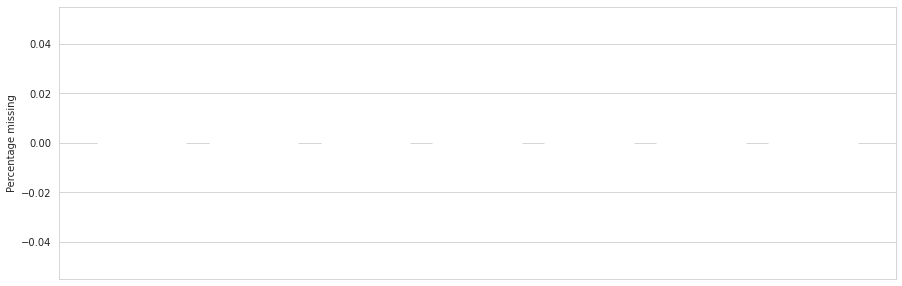

In [48]:
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

#### report: No Null values

Text(0, 0.5, 'count')

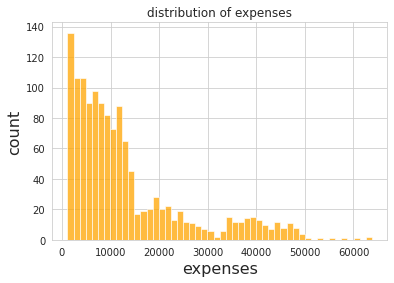

In [196]:
plt.title("distribution of expenses")
p = sns.histplot(x='expenses',data=df,bins=50,color='orange')
p.set_xlabel("expenses", fontsize=16)
p.set_ylabel("count",fontsize=16)

In [50]:
df.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46


### Creating dummy variables

In [57]:
one_hot_data = pd.get_dummies(df[categorical_fea])

In [56]:
one_hot_data.head(3)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0


In [59]:
df = pd.concat([df[numerical_fea],one_hot_data],axis = 1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   expenses          1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [61]:
df

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


## Plot distribution of all independent Numerical variables

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

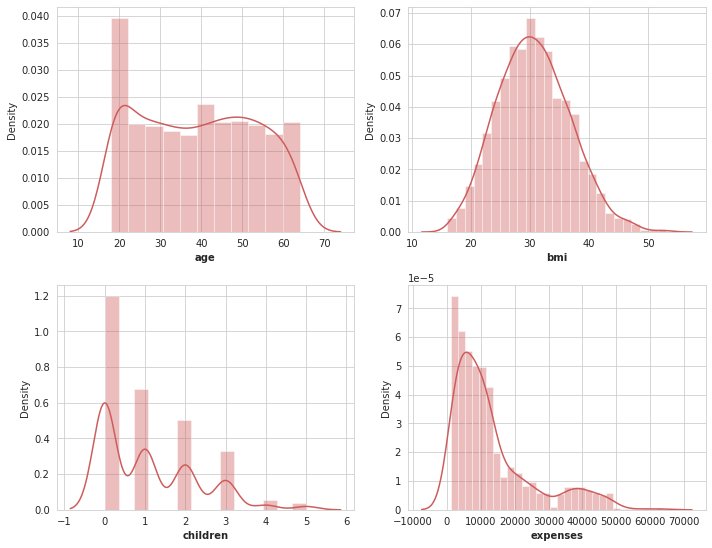

In [62]:


plt.figure(figsize=(10,15))
for i,col in enumerate(numerical_fea):
    plt.subplot(4,2,i+1)
    sns.distplot(x=df[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

#### Report:
. Asper the above plot most of the features are not normally distributed



## Boxplot (Numerical fea)

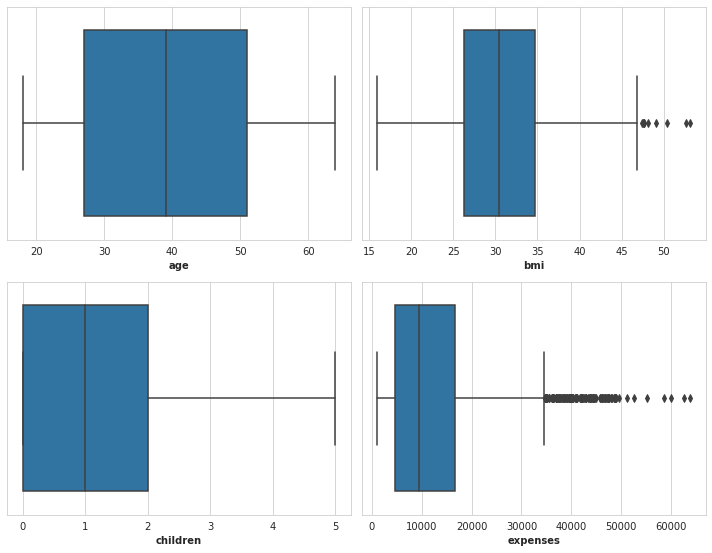

In [222]:
plt.figure(figsize=(10,15))
for i,col in enumerate(numerical_fea):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

## Countplot (categorical fea)

In [ ]:
# Countplot

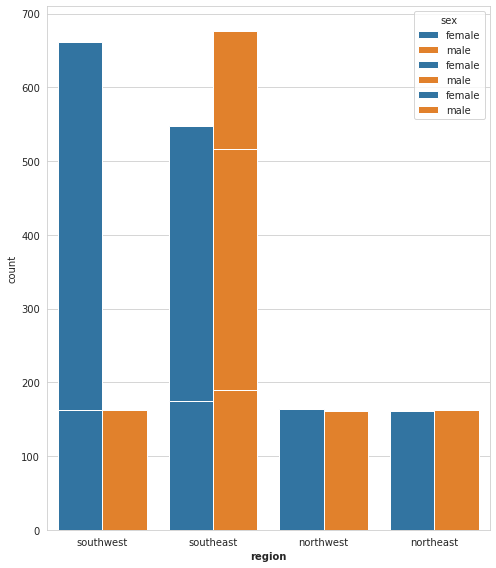

In [221]:
plt.figure(figsize=(7,8))
for i,col in enumerate(categorical_fea):
    plt.plot(3,1,i+1)
    sns.countplot(x=df[col],hue=df['sex'])
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

## Barplot (categorical fea)

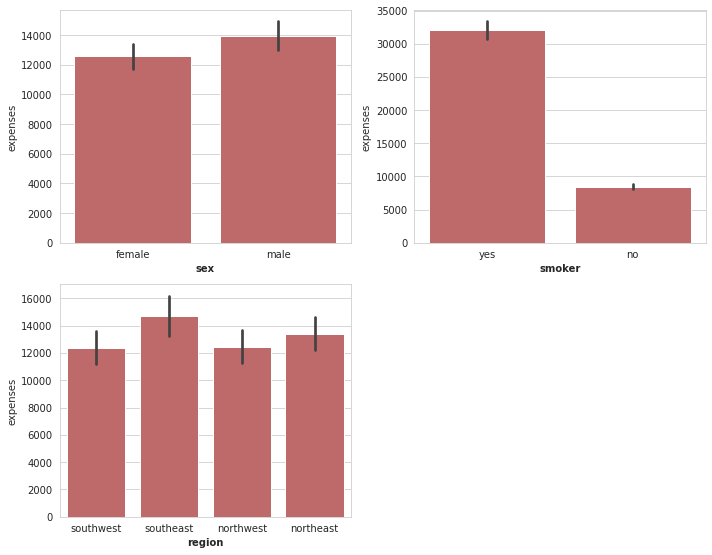

In [210]:
plt.figure(figsize=(10,15))
for i,col in enumerate(categorical_fea):
    plt.subplot(4,2,i+1)
    sns.barplot(x=df[col],y=df['expenses'],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

### Regression Plot (numerical fea)

In [ ]:
# Regression Plot

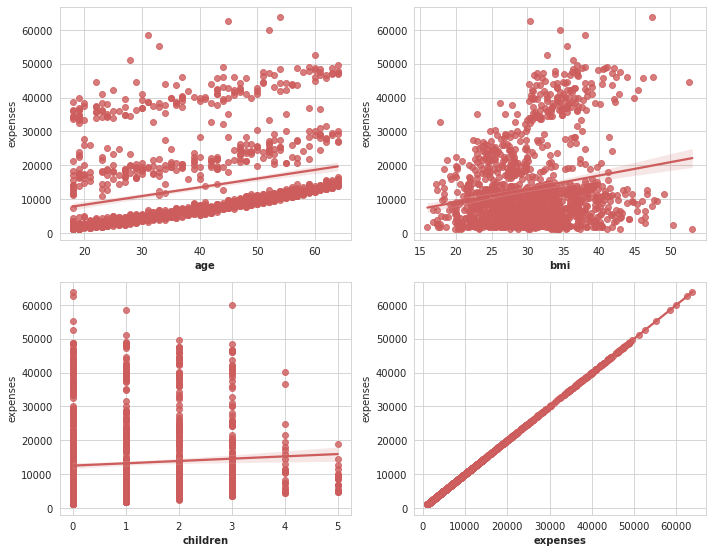

In [213]:
plt.figure(figsize=(10,15))
for i,col in enumerate(numerical_fea):
    plt.subplot(4,2,i+1)
    sns.regplot(x=df[col],y=df['expenses'],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [68]:
df.corr()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109341,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109341,1.000000,0.012645,0.198576,-0.046380,0.046380,-0.003968,0.003968,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.012645,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
expenses,0.299008,0.198576,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046380,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046380,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003968,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003968,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138091,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135992,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


<AxesSubplot:>

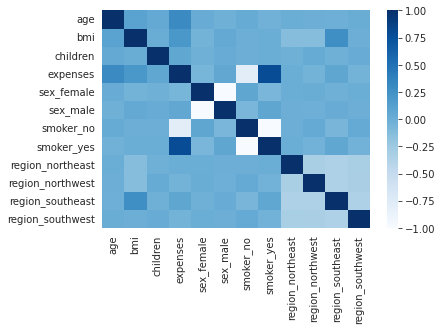

In [70]:

sns.heatmap(df.corr(),cmap='Blues')

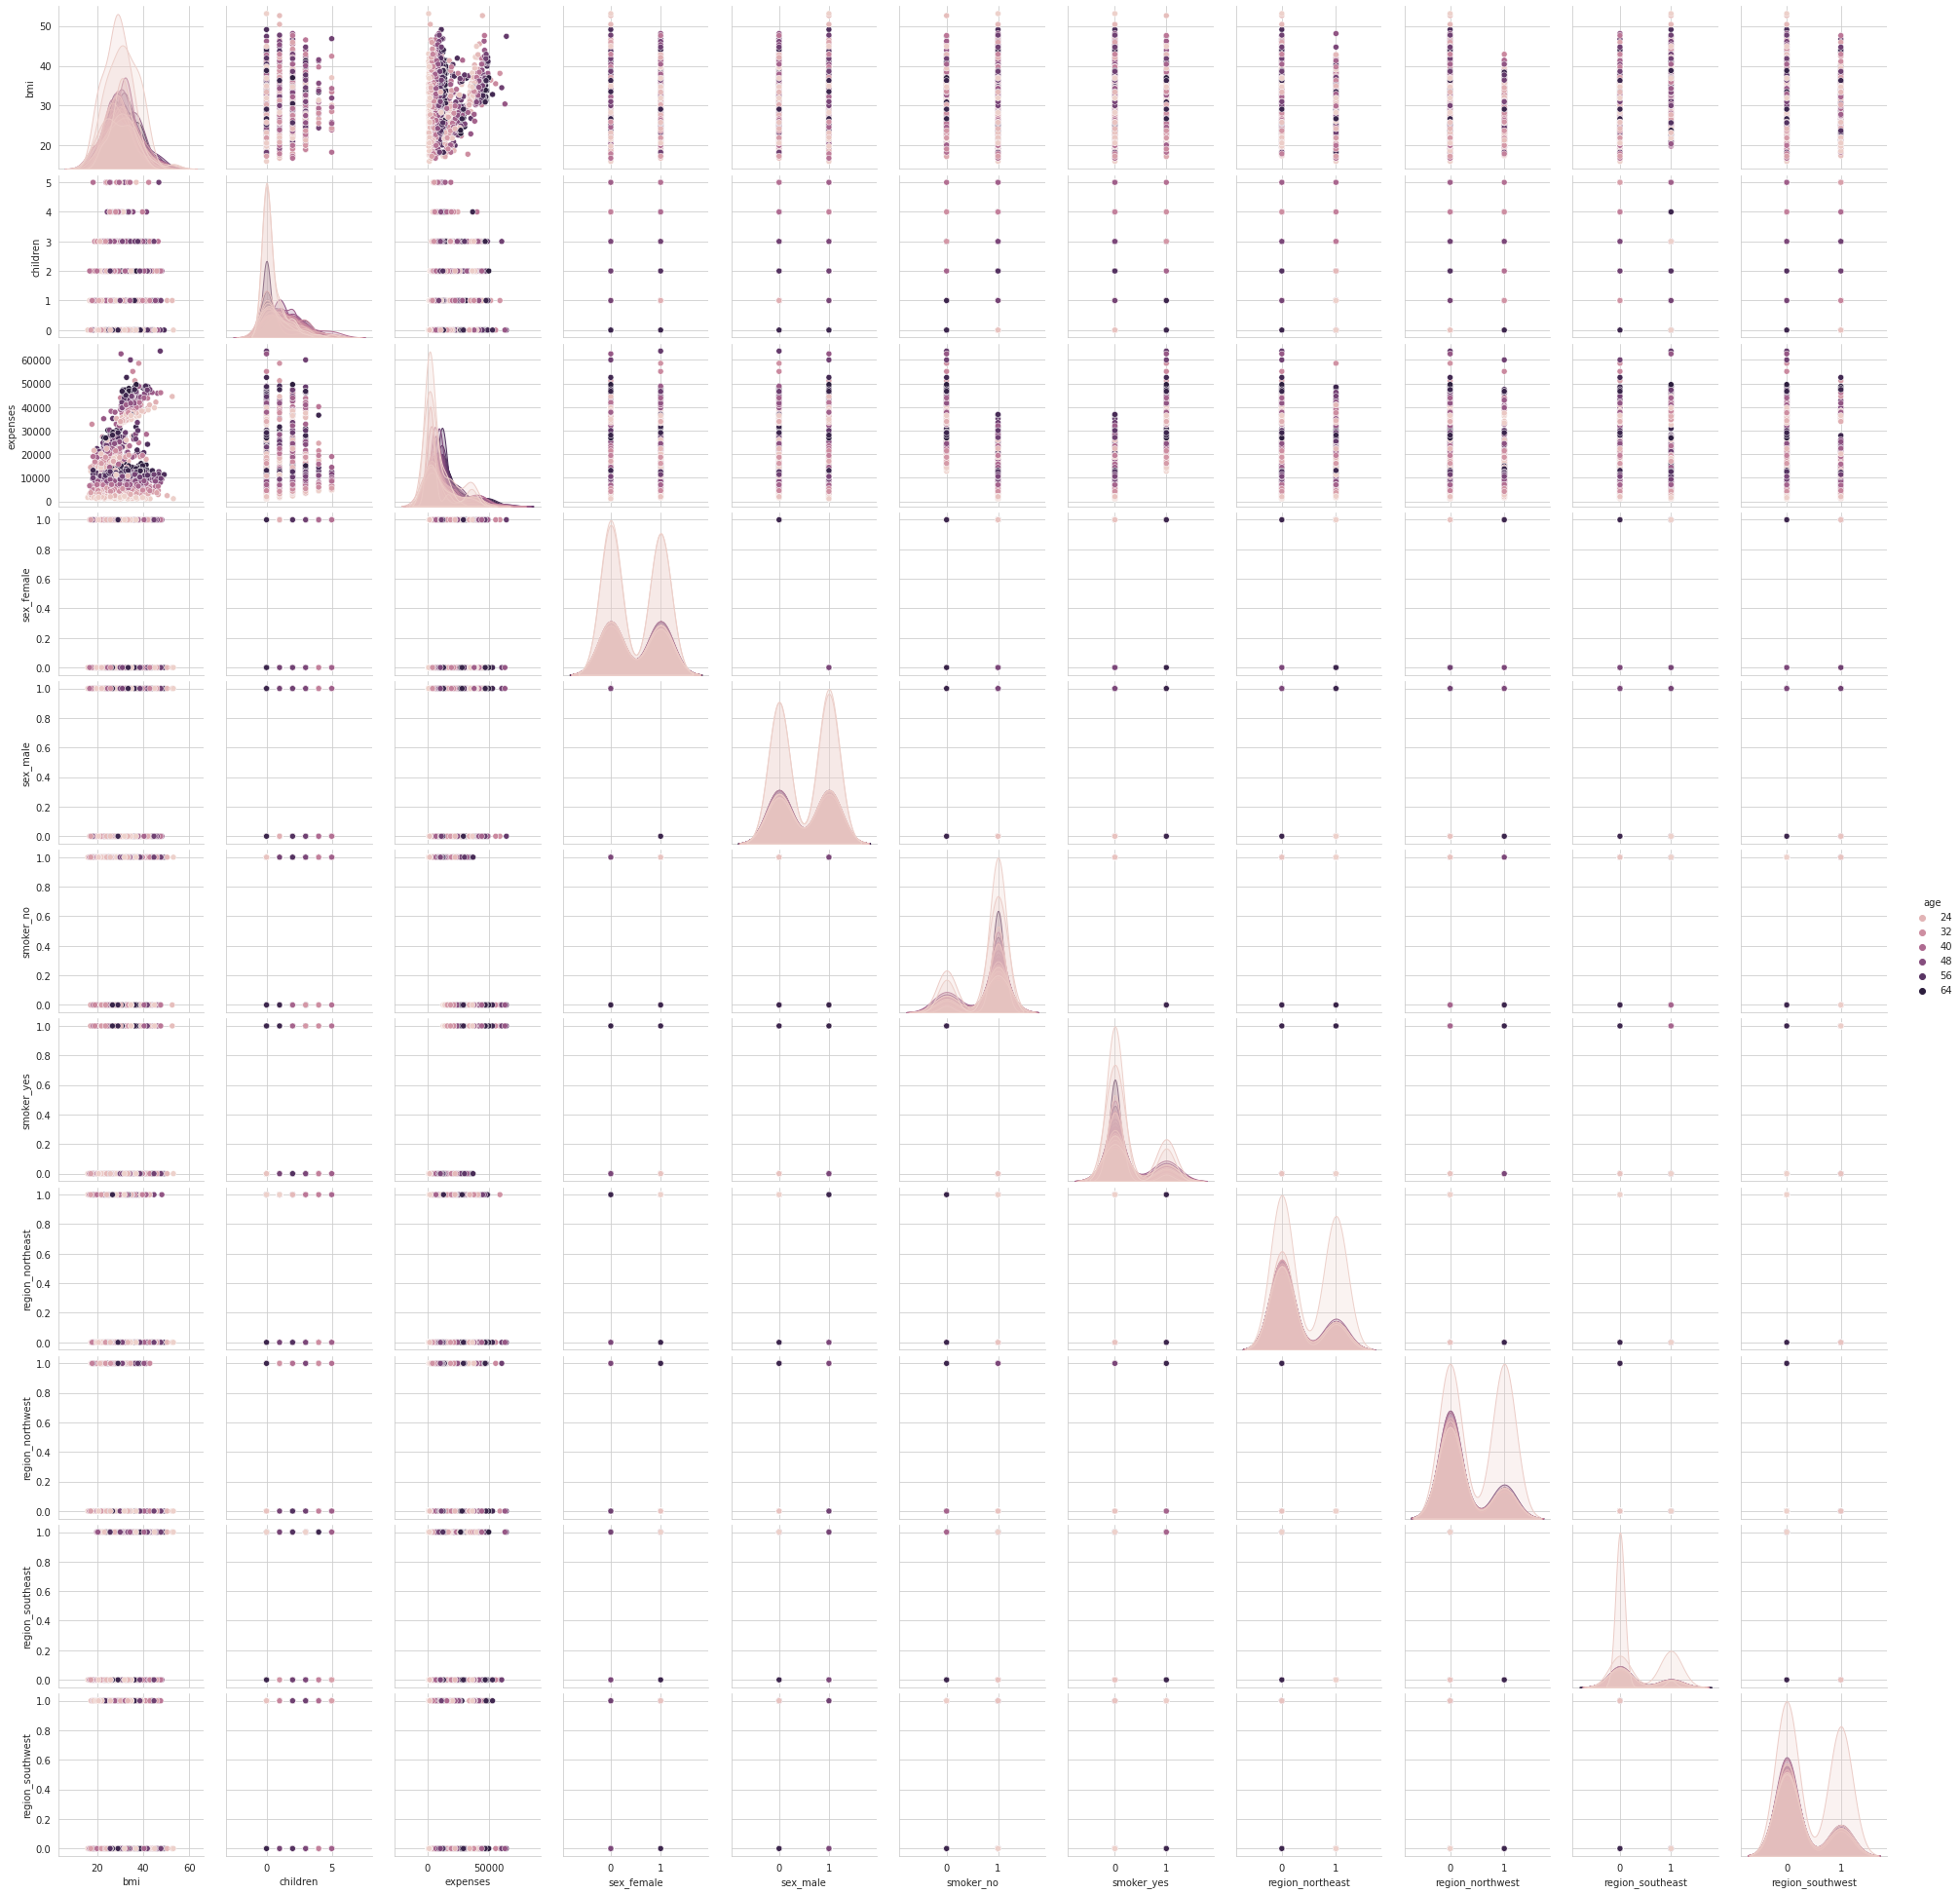

In [72]:
sns.pairplot(data=df,hue='age')

## Evaluate Model on Different experiments

In [26]:
# spliting X and y for all experiments

In [86]:
X =df.drop('expenses',axis=1)
y = df['expenses']

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3, random_state=42)

In [88]:
print(X_train.shape, y_train.shape)

(936, 11) (936,)


In [89]:
print(X_test.shape, y_test.shape)

(402, 11) (402,)


## Standardize or feature scalling the dataset

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [100]:
X_train = scaler.fit_transform(X_train)

In [101]:
X_test = scaler.transform(X_test)

In [102]:
X_train

array([[ 1.54446486,  0.10949025, -0.91501097, ...,  1.75708174,
        -0.59380229, -0.55760593],
       [ 0.48187425, -0.49119089, -0.91501097, ..., -0.56912549,
        -0.59380229,  1.79338122],
       [ 1.04858924,  0.22628936,  1.56027883, ..., -0.56912549,
         1.68406222, -0.55760593],
       ...,
       [ 1.33194673, -0.89164499, -0.91501097, ..., -0.56912549,
        -0.59380229, -0.55760593],
       [-0.15568012,  2.84592657,  0.73518223, ..., -0.56912549,
        -0.59380229,  1.79338122],
       [ 1.11942861, -0.10742238, -0.91501097, ..., -0.56912549,
        -0.59380229,  1.79338122]])

In [104]:
X_test

array([[ 0.41103487, -0.89164499,  0.73518223, ..., -0.56912549,
        -0.59380229, -0.55760593],
       [-0.22651949, -0.09073679, -0.91501097, ...,  1.75708174,
        -0.59380229, -0.55760593],
       [ 1.75698298, -0.60799   , -0.91501097, ...,  1.75708174,
        -0.59380229, -0.55760593],
       ...,
       [-1.50162823, -0.39107737, -0.91501097, ..., -0.56912549,
        -0.59380229, -0.55760593],
       [ 1.33194673,  0.92708403, -0.91501097, ..., -0.56912549,
         1.68406222, -0.55760593],
       [-1.35994948, -1.42558378, -0.08991437, ..., -0.56912549,
        -0.59380229,  1.79338122]])

# Model Training

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
regression = LinearRegression()

In [107]:
regression

LinearRegression()

In [109]:
regression.fit(X_train,y_train)

LinearRegression()

### Coefficient and intercept

In [110]:
print("coefficient ",regression.coef_)

coefficient  [3.66259502e+03 2.21576698e+03 4.77319913e+02 5.11462776e+15
 5.11462776e+15 2.21478562e+17 2.21478562e+17 3.94494645e+17
 3.87853431e+17 3.96084775e+17 3.83765370e+17]


In [111]:
print("intercept ",regression.intercept_)

intercept  13372.684473585865


In [112]:
# prediction for the test data
reg_pred = regression.predict(X_test)
reg_pred

array([ 9020.68447359,  6524.68447359, 35740.68447359,  9116.68447359,
       26332.68447359, 11964.68447359,  -675.31552641, 17116.68447359,
         828.68447359, 11004.68447359, 27964.68447359,  9244.68447359,
        4956.68447359, 38396.68447359, 40284.68447359, 36956.68447359,
       15388.68447359, 35324.68447359,  8796.68447359, 30300.68447359,
        4156.68447359, 10812.68447359,  3004.68447359,  7612.68447359,
       10620.68447359, 13244.68447359, 15036.68447359,  5500.68447359,
       10044.68447359,  2300.68447359,  9276.68447359, 12636.68447359,
        4444.68447359,  2460.68447359,  5180.68447359, 14012.68447359,
        2108.68447359,  9020.68447359, 31996.68447359, 32348.68447359,
        3900.68447359,  4188.68447359, 14652.68447359, 11228.68447359,
        9084.68447359, 12732.68447359,  4732.68447359,  3132.68447359,
       35260.68447359,  9532.68447359, 15868.68447359,  2428.68447359,
       12156.68447359,  1980.68447359, 13756.68447359, 13244.68447359,
      

In [113]:
# Mean_squared_error, Mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

34410879.61966635
4261.460898113474
5866.0787260031175


In [114]:
# Performance metrics
# R squared and adjusted R square
# R squared
from sklearn.metrics import r2_score
linear_score=r2_score(y_test,reg_pred)
print(linear_score)

# Adjusted R Squared
#### adjusted R square
#### display adjusted R-squared
print(1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7653125879883471
0.7586931994444287


In [138]:
def model_det(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    print()
    # train, test Model pred
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    print()
    print("MSE MAE RMSE")
    # MSE MAE RMSE
    print("Mean Square Error ",mean_squared_error(y_test,y_pred_model_test))
    print("Mean Absolute Error ",mean_absolute_error(y_test,y_pred_model_test))
    print("Root Mean Square Error ",np.sqrt(mean_squared_error(y_test,y_pred_model_test)))
    print()
    print("R2Score Model")
    # train, test R2Score model
    R2Score_model_train = r2_score(y_train, y_pred_model_train)
    print("Training R2 Score: ", R2Score_model_train)
    R2Score_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing R2 Score: ",  R2Score_model_test)
    print( )
    print("Adj_R2Score Model")
    # train, test Adj_R2Score model
    Adj_R2Score_model_train = 1 - (1-R2Score_model_train)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("Training Adj_R2 Score: ", Adj_R2Score_model_train)
    Adj_R2Score_model_test = 1 - (1-R2Score_model_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("Testing Adj_R2 Score: ",  Adj_R2Score_model_test)


    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [139]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
LinearRegression()

LinearRegression()

In [140]:
model_det(regressor,"multilinear regression")

multilinear regression


MSE MAE RMSE
Mean Square Error  34410879.61966635
Mean Absolute Error  4261.460898113474
Root Mean Square Error  5866.0787260031175

R2Score Model
Training R2 Score:  0.7410211674946332
Testing R2 Score:  0.7653125879883471

Adj_R2Score Model
Training Adj_R2 Score:  0.7337166363214049
Testing Adj_R2 Score:  0.7586931994444287
RMSE for Training Data:  6158.913329477451
RMSE for Testing Data:  5866.0787260031175
Accuracy for 20 - Fold Cross Predicted:  0.7466981000116759


# Ridge Regression

In [142]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=.99)
ridgeR.fit(X_train,y_train)
model_det(ridgeR,"Ridge Regression ")

Ridge Regression 


MSE MAE RMSE
Mean Square Error  33777649.6874477
Mean Absolute Error  4145.265733644485
Root Mean Square Error  5811.85423831738

R2Score Model
Training R2 Score:  0.7424099901263734
Testing R2 Score:  0.7696313120559464

Adj_R2Score Model
Training Adj_R2 Score:  0.7351446308735275
Testing Adj_R2 Score:  0.7631337336780372
RMSE for Training Data:  6142.3769650745835
RMSE for Testing Data:  5811.85423831738
Accuracy for 20 - Fold Cross Predicted:  0.7467015687862073


# Lasso Regression

In [144]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05)
lasso.fit(X_train,y_train)
model_det(lasso,"Lasso Regression ")

Lasso Regression 


MSE MAE RMSE
Mean Square Error  33777095.326205276
Mean Absolute Error  4144.883992759768
Root Mean Square Error  5811.806545834546

R2Score Model
Training R2 Score:  0.7424103108697158
Testing R2 Score:  0.7696350928836015

Adj_R2Score Model
Training Adj_R2 Score:  0.735144960663477
Testing Adj_R2 Score:  0.7631376211444211
RMSE for Training Data:  6142.373140921752
RMSE for Testing Data:  5811.806545834546
Accuracy for 20 - Fold Cross Predicted:  0.7466988392107343


# ElasticNet Regression

In [145]:
from sklearn.linear_model import ElasticNet
# Train the model
el_net = ElasticNet(alpha=.02,l1_ratio=.2)
el_net.fit(X_train,y_train)

model_det(el_net,"ElasticNet Regression ")

ElasticNet Regression 


MSE MAE RMSE
Mean Square Error  33795730.807521895
Mean Absolute Error  4151.193272231395
Root Mean Square Error  5813.409568189902

R2Score Model
Training R2 Score:  0.7423384467073105
Testing R2 Score:  0.7695079960778782

Adj_R2Score Model
Training Adj_R2 Score:  0.7350710695631577
Testing Adj_R2 Score:  0.7630069395569978
RMSE for Training Data:  6143.22990215194
RMSE for Testing Data:  5813.409568189902
Accuracy for 20 - Fold Cross Predicted:  0.7454076349180764


# Decision Tree

In [152]:
from sklearn.tree import DecisionTreeRegressor

In [154]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
model_det(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression


MSE MAE RMSE
Mean Square Error  20957331.492411833
Mean Absolute Error  2672.988410615133
Root Mean Square Error  4577.917811889138

R2Score Model
Training R2 Score:  0.8779410468755883
Testing R2 Score:  0.8570678243338631

Adj_R2Score Model
Training Adj_R2 Score:  0.8744983584541305
Testing Adj_R2 Score:  0.8530364039945618
RMSE for Training Data:  4228.2122353167215
RMSE for Testing Data:  4577.917811889138
Accuracy for 20 - Fold Cross Predicted:  0.8517265048084235


# Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train,y_train)

model_det(random_forest_reg,"Random Forest Regression")

Random Forest Regression


MSE MAE RMSE
Mean Square Error  21786559.065425057
Mean Absolute Error  2598.504051990051
Root Mean Square Error  4667.607424090533

R2Score Model
Training R2 Score:  0.9747584169173479
Testing R2 Score:  0.851412366663785

Adj_R2Score Model
Training Adj_R2 Score:  0.9740464748304013
Testing Adj_R2 Score:  0.8472214334158404
RMSE for Training Data:  1922.782907436925
RMSE for Testing Data:  4667.607424090533
Accuracy for 20 - Fold Cross Predicted:  0.8384891650642876


# XGBoost

In [158]:
import xgboost as xgb

In [161]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123,verbosity=0)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  

model_det(xgb_r,"Xg_boost")

Xg_boost


MSE MAE RMSE
Mean Square Error  19869941.834197562
Mean Absolute Error  2284.9122612280394
Root Mean Square Error  4457.571293226566

R2Score Model
Training R2 Score:  0.9186233222453871
Testing R2 Score:  0.8644839865347471

Adj_R2Score Model
Training Adj_R2 Score:  0.9163280826164109
Testing Adj_R2 Score:  0.8606617400011118
RMSE for Training Data:  3452.4065827653408
RMSE for Testing Data:  4457.571293226566
Accuracy for 20 - Fold Cross Predicted:  0.8505018200770418


# GradientBoostRegression

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

In [163]:
Gb_reg = GradientBoostingRegressor(random_state=0)
Gb_reg.fit(X_train, y_train)

model_det(Gb_reg,"Gradient Boost Regression ")

Gradient Boost Regression 


MSE MAE RMSE
Mean Square Error  19526203.71601384
Mean Absolute Error  2465.016758597356
Root Mean Square Error  4418.846423673699

R2Score Model
Training R2 Score:  0.902543197053236
Testing R2 Score:  0.8668283325746603

Adj_R2Score Model
Training Adj_R2 Score:  0.8997944154316606
Testing Adj_R2 Score:  0.8630722086216379
RMSE for Training Data:  3778.139926965801
RMSE for Testing Data:  4418.846423673699
Accuracy for 20 - Fold Cross Predicted:  0.8583036254288966


# KNN Reg

In [164]:
from sklearn.neighbors import KNeighborsRegressor

In [165]:
knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(X_train, y_train)

model_det(knn_reg,"KNeighborsRegressor")

KNeighborsRegressor


MSE MAE RMSE
Mean Square Error  31812365.96961033
Mean Absolute Error  3326.8291542288557
Root Mean Square Error  5640.2452047415745

R2Score Model
Training R2 Score:  0.9229412884951933
Testing R2 Score:  0.7830348447382174

Adj_R2Score Model
Training Adj_R2 Score:  0.9207678376578783
Testing Adj_R2 Score:  0.7769153147180132
RMSE for Training Data:  3359.5633102213233
RMSE for Testing Data:  5640.2452047415745
Accuracy for 20 - Fold Cross Predicted:  0.2634474484014062


In [166]:
from sklearn.ensemble import AdaBoostRegressor

In [168]:
ada_regr = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_regr.fit(X_train, y_train)

model_det(ada_regr,"AdaBoostRegressor")

AdaBoostRegressor


MSE MAE RMSE
Mean Square Error  28439196.703686614
Mean Absolute Error  4322.124202716974
Root Mean Square Error  5332.841334943935

R2Score Model
Training R2 Score:  0.822399376746681
Testing R2 Score:  0.8060403701431665

Adj_R2Score Model
Training Adj_R2 Score:  0.8173901283985104
Testing Adj_R2 Score:  0.8005697139164354
RMSE for Training Data:  5100.28213644358
RMSE for Testing Data:  5332.841334943935
Accuracy for 20 - Fold Cross Predicted:  0.8200609511716869
